In [16]:
import matplotlib.pyplot as plt
from os import path

TRIALS = 1
TRIAL_LENGTH = 180
DISCONNECT_TIME = 30
RECONNECT_TIME = 120

DATA_DIR = './memory_comparison'

def read_file(client, test_type, trial):
    filepath = client + "_" + test_type + "_" + str(trial) + ".txt"
    
    with open(path.join(DATA_DIR, filepath), 'r') as file:
        return [int(line) / 2**20 for line in file.readlines()]



python_disconnect_list = [read_file('python', 'disconnect', i) for i in range(TRIALS)]
python_cpp_disconnect_list = [read_file('python-cpp', 'disconnect', i) for i in range(TRIALS)]

python_reconnect_list = [read_file('python', 'reconnect', i) for i in range(TRIALS)]
python_cpp_reconnect_list = [read_file('python-cpp', 'reconnect', i) for i in range(TRIALS)]

<IPython.core.display.Javascript object>


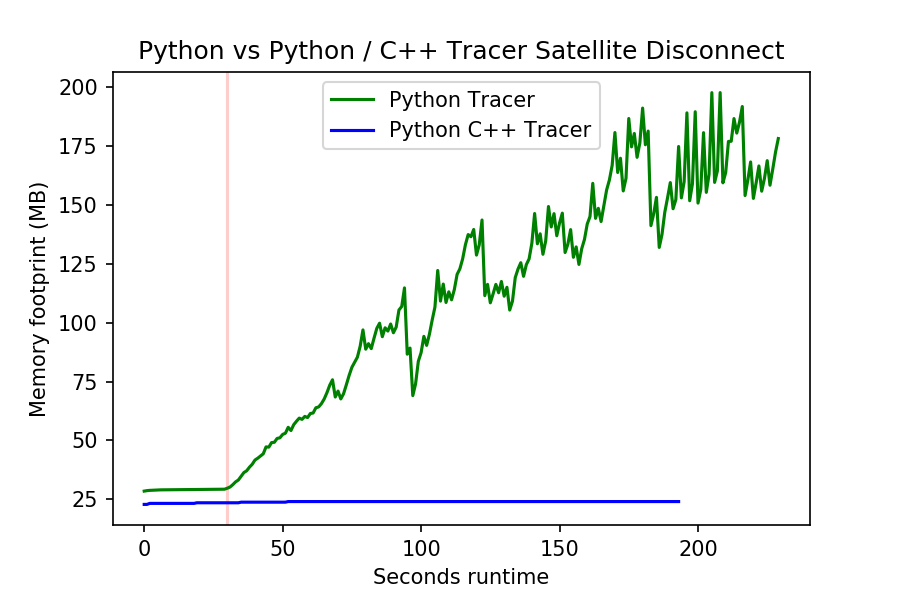

In [45]:
%matplotlib notebook

fig, ax = plt.subplots(dpi=150, figsize=(6,4))

# setup restart column
ax.set_title("Python vs Python / C++ Tracer Satellite Disconnect")
ax.set_xlabel("Seconds runtime")
ax.set_ylabel("Memory footprint (MB)")
ax.axvline(x=DISCONNECT_TIME, alpha=.2, color='red')

for i, python_disconnect in enumerate(python_disconnect_list):
    ax.plot(python_disconnect, color='green', label='Python Tracer' if i==0 else None)

for i, python_cpp_disconnect in enumerate(python_cpp_disconnect_list):
    ax.plot(python_cpp_disconnect, color='blue', label='Python C++ Tracer' if i==0 else None)

ax.legend()
fig.show()

<IPython.core.display.Javascript object>


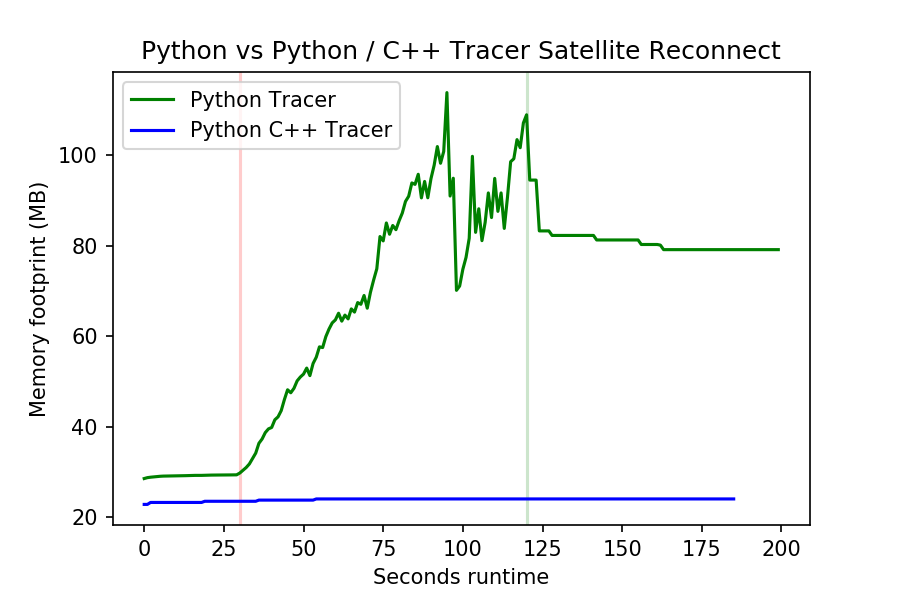

In [46]:
%matplotlib notebook

fig, ax = plt.subplots(dpi=150, figsize=(6,4))

# setup restart column
ax.set_title("Python vs Python / C++ Tracer Satellite Reconnect")
ax.set_xlabel("Seconds runtime")
ax.set_ylabel("Memory footprint (MB)")
ax.axvline(x=DISCONNECT_TIME, alpha=.2, color='red')
ax.axvline(x=RECONNECT_TIME, alpha=.2, color='green')

for i, python_reconnect in enumerate(python_reconnect_list):
    ax.plot(python_reconnect, color='green', label='Python Tracer' if i==0 else None)

for i, python_cpp_reconnect in enumerate(python_cpp_reconnect_list):
    ax.plot(python_cpp_reconnect, color='blue', label='Python C++ Tracer' if i==0 else None)

ax.legend()
fig.show()